# EDA-Yelp!

El siguiente análisis exploratorio de datos llevará a cabo la comparación y correlacion de variables, utilizando como fuente una datos de la aplicación Yelp!. Se abordará el marco contextual de los restaurantes de comida mexicanas en el estado de Florida, EEUU. dentro del marco temporal comprendido entre principios de 2017 a finales de 2021 y, a su vez, se marcará un foco en la cadena de restaurantes Taco Bell para estudiar su posición en el mercado.

### Librerías.

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

### Rutas

In [17]:
path_buisness = 'C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\business.parquet'
path_review = 'C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\review.parquet'
path_tip = 'C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\tip.parquet'
path_user = 'C:\\Users\\fedez\\OneDrive\\Escritorio\\ProyectoG4-Google_Yelp\\Data\\Parquet\\user.parquet'

### Dataframes

In [18]:
df_buisness = pd.read_parquet(path_buisness)
df_review = pd.read_parquet(path_review)
df_tip = pd.read_parquet(path_tip)
df_user = pd.read_parquet(path_user)

Combinación de dataframes.

In [ ]:
df_buisness1 = df_buisness[['business_id', 'name']]
df_review1 = df_review[['business_id', 'review_id', 'user_id', 'stars']]
df_merge_1 = df_buisness1.merge(df_review1, on='business_id', how='inner')

## Marco general.

### Restaurantes con mayor flujo de reseñas

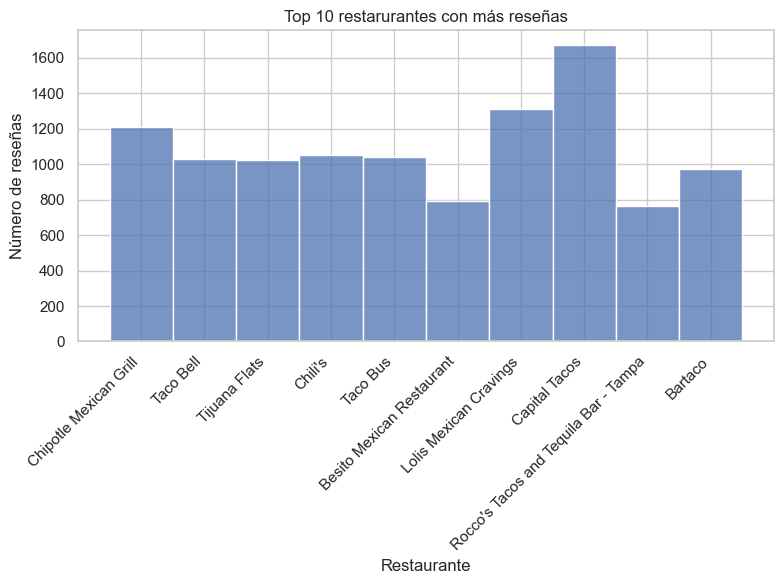

In [173]:
top_10_names = df_merge_1['name'].value_counts().nlargest(10)

# Creación del gráfico histplot utilizando Seaborn
plt.figure(figsize=(8, 6))
sns.histplot(data=df_merge_1[df_merge_1['name'].isin(top_10_names.index)], x='name', bins=10, discrete=True)

# Personalización del gráfico
plt.xlabel('Restaurante')
plt.ylabel('Número de reseñas')
plt.title('Top 10 restarurantes con más reseñas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

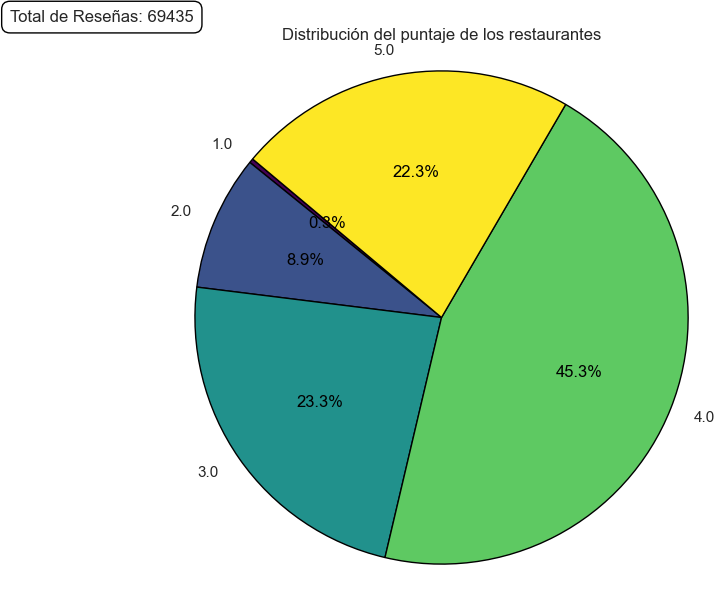

In [162]:
df_buisness['stars'] = np.ceil(df_buisness['stars'])

# Contar la cantidad de restaurantes para cada puntaje
puntaje_counts = df_buisness['stars'].value_counts().sort_index()

# Obtener el número total de reseñas
total_reviews = df_buisness['review_count'].sum()

# Crear una paleta de colores para cada fracción
colors = plt.cm.viridis(np.linspace(0, 1, len(puntaje_counts)))

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
patches, texts, autotexts = plt.pie(puntaje_counts, labels=puntaje_counts.index, autopct='%1.1f%%', startangle=140, colors=colors,
                                    wedgeprops={'edgecolor': 'black'})  # Añadir contorno negro

# Personalizar los textos de porcentaje
for autotext in autotexts:
    autotext.set_color('black')  # Color de los textos de porcentaje

plt.title('Distribución del puntaje de los restaurantes')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Añadir cuadro de texto con el número total de reseñas
plt.text(-1.75, 1.2, f'Total de Reseñas: {total_reviews}', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()

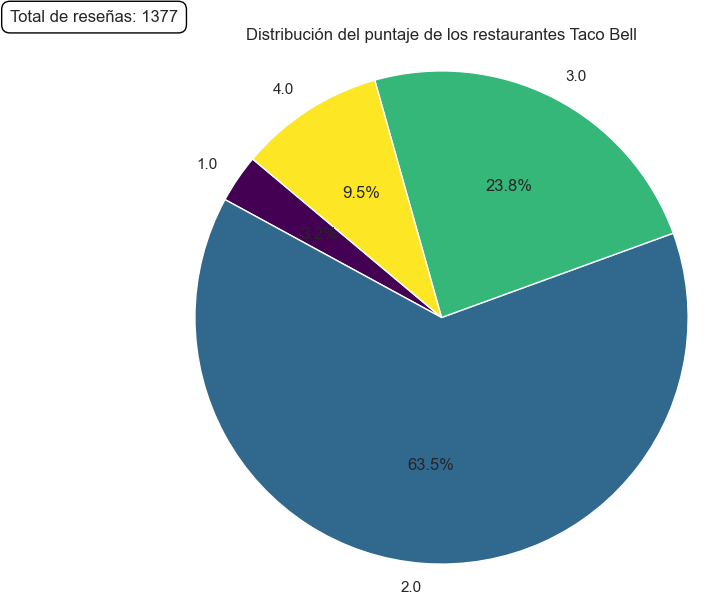

In [160]:
df_tacobell = df_buisness[df_buisness['name'] == 'Taco Bell'].copy()

# Redondear el puntaje hacia arriba
df_tacobell['stars'] = np.ceil(df_tacobell['stars'])

# Contar la cantidad de restaurantes para cada puntaje
puntaje_counts = df_tacobell['stars'].value_counts().sort_index()

# Obtener el número total de reseñas
total_reviews = df_tacobell['review_count'].sum()

# Crear una paleta de colores para cada fracción
colors = plt.cm.viridis(np.linspace(0, 1, len(puntaje_counts)))

# Crear el gráfico de pastel
plt.figure(figsize=(7, 7))
plt.pie(puntaje_counts, labels=puntaje_counts.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Distribución del puntaje de los restaurantes Taco Bell')
plt.axis('equal')  # Para asegurar que el gráfico sea un círculo

# Añadir cuadro de texto con el número total de reseñas
plt.text(-1.75, 1.2, f'Total de reseñas: {total_reviews}', fontsize=12, bbox=dict(facecolor='none', edgecolor='black', boxstyle='round,pad=0.5'))

plt.show()


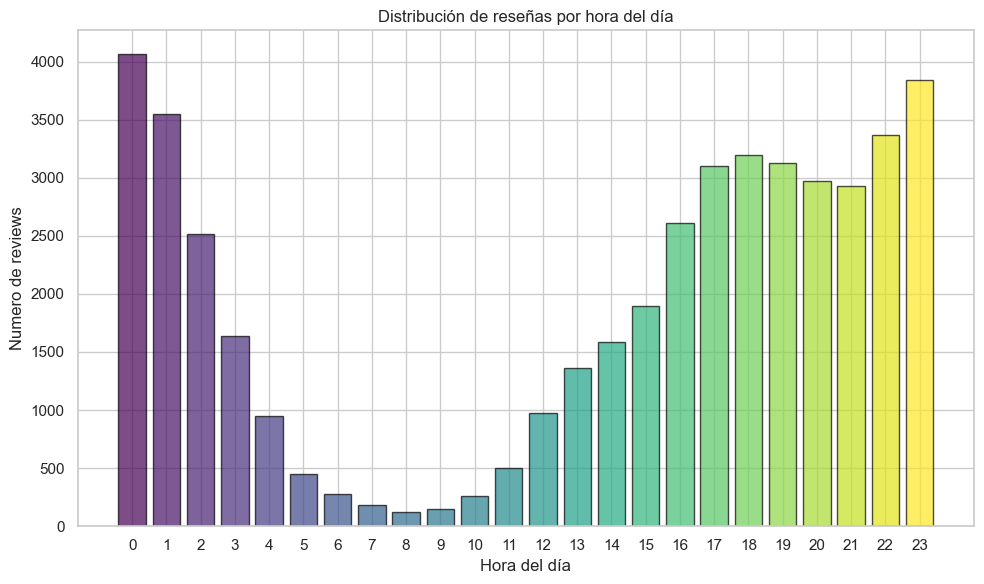

In [107]:
colors = plt.cm.viridis(np.linspace(0, 1, 24))  # 24 colores para cada hora del día

# Crear el gráfico de barras
plt.figure(figsize=(10, 6))
plt.bar(range(24), df_review['hora'].value_counts().sort_index(), color=colors, edgecolor='black', alpha=0.7)

# Personalizar el gráfico
plt.xlabel('Hora del día')
plt.ylabel('Numero de reviews')
plt.title('Distribución de reseñas por hora del día')
plt.xticks(range(24))  # Establecer marcas en el eje x para cada hora
plt.grid(True)
plt.tight_layout()

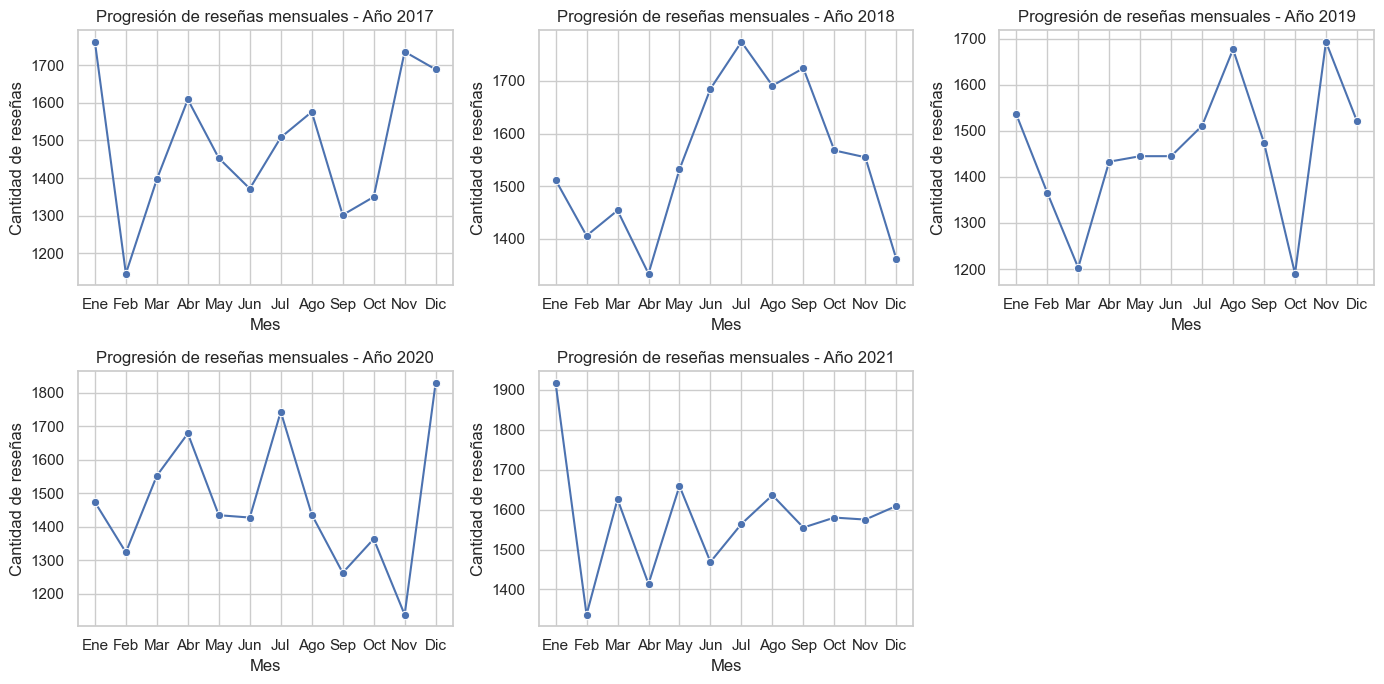

In [130]:
np.random.seed(0)
dates = pd.date_range('2017-01-01', '2021-12-31', freq='D')
df = pd.DataFrame({'fecha': dates, 'review_count': np.random.randint(0, 100, len(dates))})

# Extraer año y mes de la columna de fecha
df['year'] = df['fecha'].dt.year
df['month'] = df['fecha'].dt.month

# Agrupar por año y mes, y sumar el número de reseñas por mes
data_mensual = df.groupby(['year', 'month']).agg({'review_count': 'sum'}).reset_index()

# Convertir la columna 'month' a tipo int para asegurar que se ordene correctamente
data_mensual['month'] = data_mensual['month'].astype(int)

# Crear la figura con el tamaño adecuado
plt.figure(figsize=(14, 7))

# Iterar sobre cada año y crear el gráfico correspondiente
for i, year in enumerate(data_mensual['year'].unique(), start=1):
    plt.subplot(2, 3, i)  # Crear subgráficos en una cuadrícula de 2x3
    sns.lineplot(
        data=data_mensual[data_mensual['year'] == year], 
        x='month', 
        y='review_count', 
        marker='o'
    )
    plt.title(f'Progresión de reseñas mensuales - Año {year}')
    plt.xlabel('Mes')
    plt.ylabel('Cantidad de reseñas')
    plt.xticks(range(1, 13), ['Ene', 'Feb', 'Mar', 'Abr', 'May', 'Jun', 'Jul', 'Ago', 'Sep', 'Oct', 'Nov', 'Dic'])

# Ajustar el diseño para asegurar que los gráficos no se sobrepongan
plt.tight_layout()

# Mostrar el gráfico
plt.show()

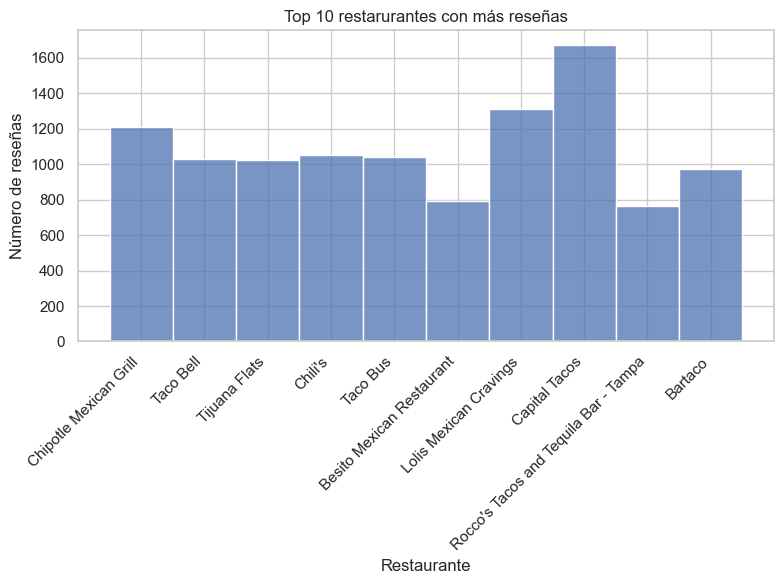

In [148]:
df_buisness1 = df_buisness[['business_id', 'name']]
df_review1 = df_review[['business_id', 'review_id', 'stars']]
df_merge_1 = df_buisness1.merge(df_review1, on='business_id', how='inner')

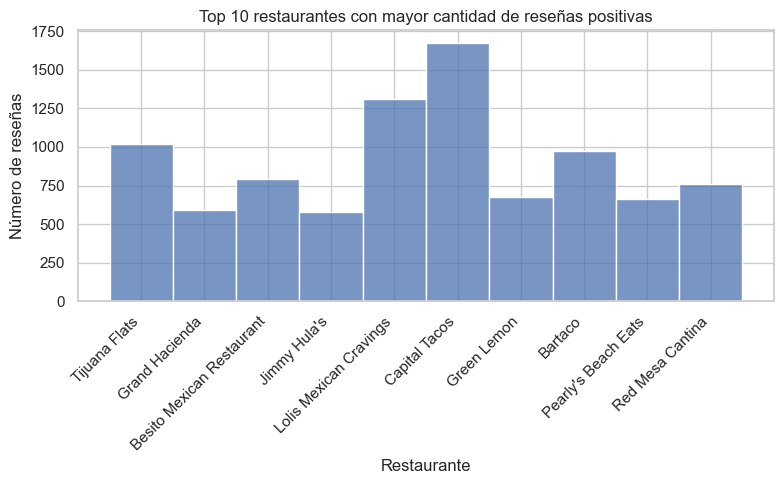

In [166]:
avg_stars = df_merge_1.groupby('name')['stars'].mean()
review_counts = df_merge_1['name'].value_counts()

# Filtrar restaurantes con calificación promedio mayor o igual a 3.5
top_restaurants = avg_stars[avg_stars >= 3.5].index

# Tomar solo los top 10 restaurantes por número de reseñas
top_10_restaurants = review_counts[top_restaurants].nlargest(10).index

# Filtrar el DataFrame original por los top 10 restaurantes
df_filtered = df_merge_1[df_merge_1['name'].isin(top_10_restaurants)]

# Creación del gráfico histplot utilizando Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtered, x='name', bins=10, discrete=True, hue_order=df_filtered)

# Personalización del gráfico
plt.xlabel('Restaurante')
plt.ylabel('Número de reseñas')
plt.title('Top 10 restaurantes con mayor cantidad de reseñas positivas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

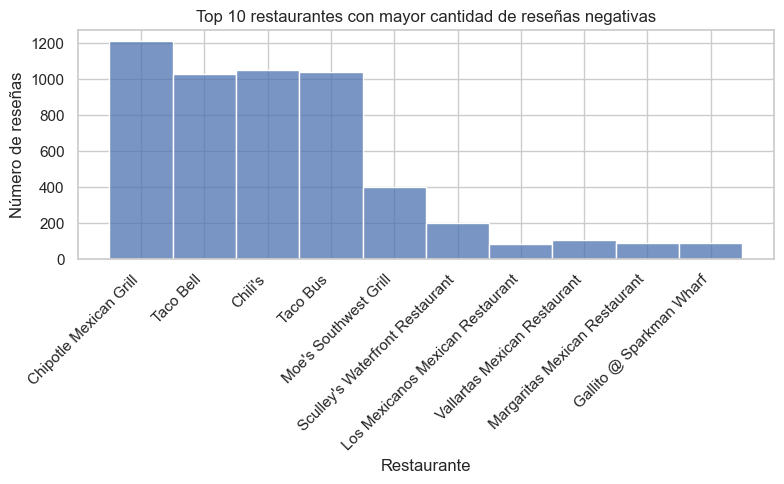

In [168]:
avg_stars = df_merge_1.groupby('name')['stars'].mean()
review_counts = df_merge_1['name'].value_counts()

# Filtrar restaurantes con calificación promedio mayor o igual a 3.5
top_restaurants = avg_stars[avg_stars < 3].index

# Tomar solo los top 10 restaurantes por número de reseñas
top_10_restaurants = review_counts[top_restaurants].nlargest(10).index

# Filtrar el DataFrame original por los top 10 restaurantes
df_filtered = df_merge_1[df_merge_1['name'].isin(top_10_restaurants)]

# Creación del gráfico histplot utilizando Seaborn
plt.figure(figsize=(8, 5))
sns.histplot(data=df_filtered, x='name', bins=10, discrete=True, hue_order=df_filtered)

# Personalización del gráfico
plt.xlabel('Restaurante')
plt.ylabel('Número de reseñas')
plt.title('Top 10 restaurantes con mayor cantidad de reseñas negativas')
plt.xticks(rotation=45, ha='right')  # Rotar etiquetas del eje x para mayor legibilidad

# Mostrar el gráfico
plt.tight_layout()
plt.show()

C:\Users\fedez\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:640: FutureWarning: SeriesGroupBy.grouper is deprecated and will be removed in a future version of pandas.
  positions = grouped.grouper.result_index.to_numpy(dtype=float)


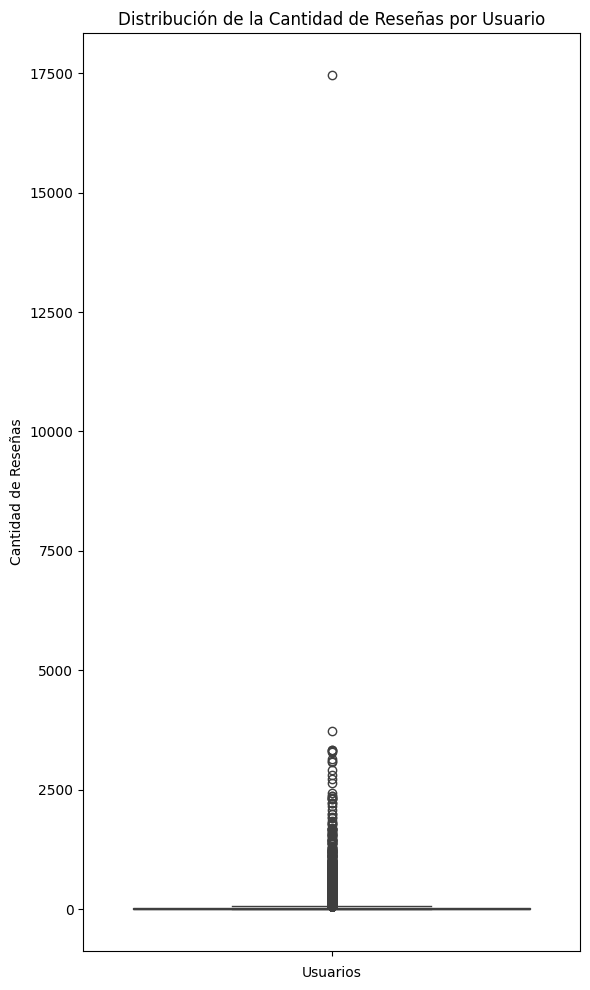

In [13]:
plt.figure(figsize=(6, 10))
sns.boxplot(data=df_user, y='review_count')

# Personalización del gráfico
plt.xlabel('Usuarios')
plt.ylabel('Cantidad de Reseñas')
plt.title('Distribución de la Cantidad de Reseñas por Usuario')

# Mostrar el gráfico
plt.tight_layout()
plt.show()